<a href="https://colab.research.google.com/github/dasog94/PresumptionofMontlyRent/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Todo list

1. 이상치 제거

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


#한글 글꼴 추가

In [ ]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

In [3]:
# 나눔 고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [4]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.2.2
설치 위치:  /usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
설정 위치:  /root/.config/matplotlib
캐시 위치:  /root/.cache/matplotlib


In [5]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [ ]:
# 한번 프린트 해보자
nanum_font

In [21]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 15.0


In [26]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=12).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [8]:
# 우선 fm._rebuild() 를 해주고, 런타임 재시작을 해준다.
fm._rebuild()

#Libs

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Load Data

In [10]:
df = pd.read_csv('/content/gdrive/My Drive/recommend_system/tracer/월세데이터.csv', encoding='CP949')

In [11]:
df = df.reindex(columns = df.columns.tolist() + ['1m당_가격'])
for i in range(len(df)):
  df.loc[i, '1m당_가격'] = df.loc[i, '보증금->월세'] / df.loc[i, '전용면적']

In [ ]:
df.head(10)

#보증금 -> 월세 / 1m^2당 가격

In [12]:
df['보증금->월세'].describe()

count    957.000000
mean      91.664734
std       61.841050
min        1.666667
25%       50.000000
50%       68.333333
75%      118.333333
max      533.333333
Name: 보증금->월세, dtype: float64

In [31]:
df['1m당_가격'].describe()

count    957.000000
mean       1.952464
std        0.927716
min        0.040219
25%        1.240599
50%        1.875821
75%        2.415945
max        5.376344
Name: 1m당_가격, dtype: float64

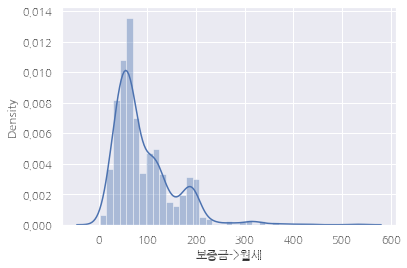

In [20]:
sns.distplot(df['보증금->월세']);

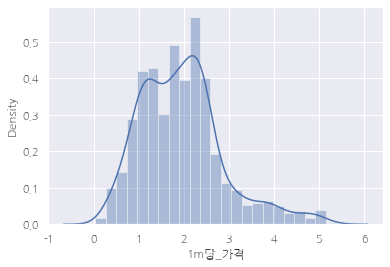

In [32]:
sns.distplot(df['1m당_가격']);

In [25]:
#skewness and kurtosis
print("Skewness: {}".format(df['보증금->월세'].skew()))
print("Kurtosis: {}".format(df['보증금->월세'].kurt()))

Skewness: 1.8249298714205324
Kurtosis: 5.50845377726896


In [33]:
#skewness and kurtosis
print("Skewness: {}".format(df['1m당_가격'].skew()))
print("Kurtosis: {}".format(df['1m당_가격'].kurt()))

Skewness: 0.881167288386924
Kurtosis: 1.0552828264451026


#산포도(공시가격)

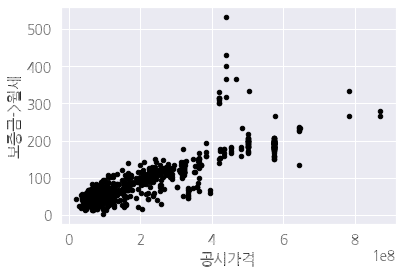

In [23]:
#scatter plot '공시가격'/'보증금->월세'
var = '공시가격'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

#산포도(3가지 거리)

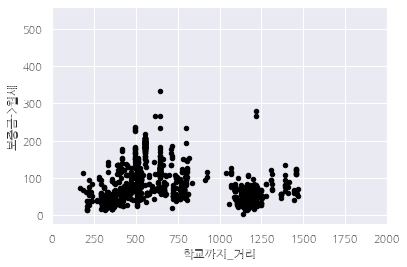

In [66]:
#scatter plot '공시가격'/'보증금->월세'
var = '학교까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', xlim=(0, 2000), c=np.array([0, 0, 0]).reshape(1,-1));

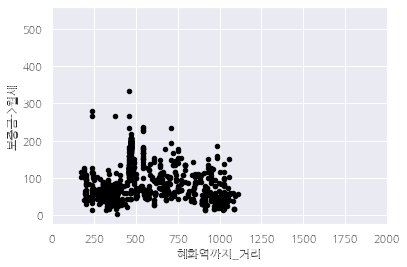

In [68]:
#scatter plot '공시가격'/'보증금->월세'
var = '혜화역까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', xlim=(0, 2000), c=np.array([0, 0, 0]).reshape(1,-1));

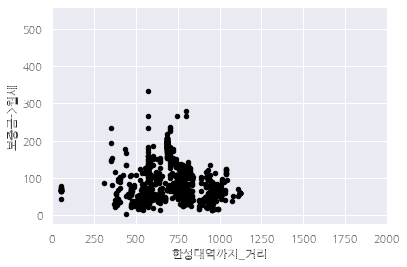

In [69]:
#scatter plot '공시가격'/'보증금->월세'
var = '한성대역까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', xlim=(0, 2000), c=np.array([0, 0, 0]).reshape(1,-1));

# 상자 수염 그림 (법정동명)

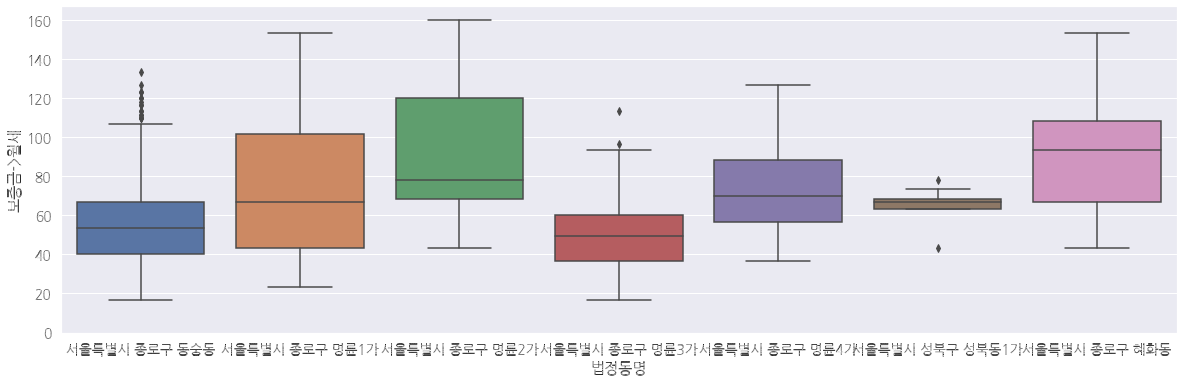

In [183]:
#box plot overallqual/saleprice
var = '법정동명'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

# 상자 수염 그림 (건축년도, 층, 전월세구분, 거주타입, 계약년월)

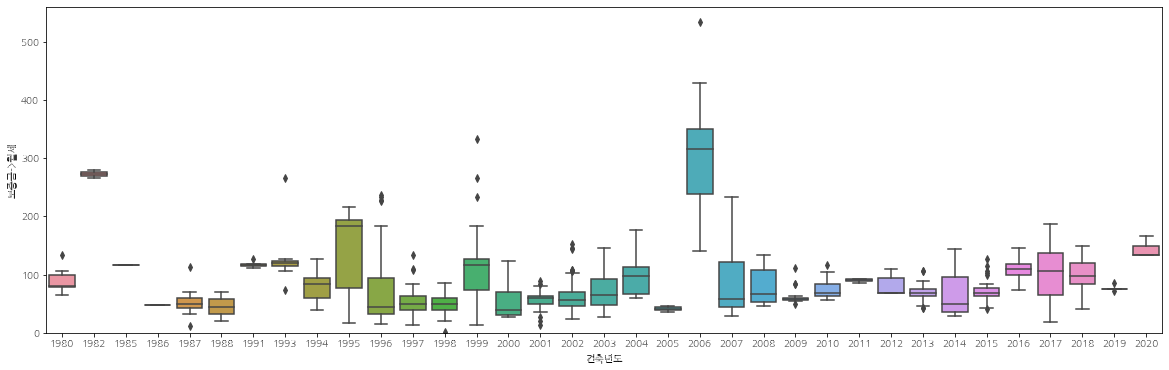

In [15]:
#box plot overallqual/saleprice
var = '건축년도'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

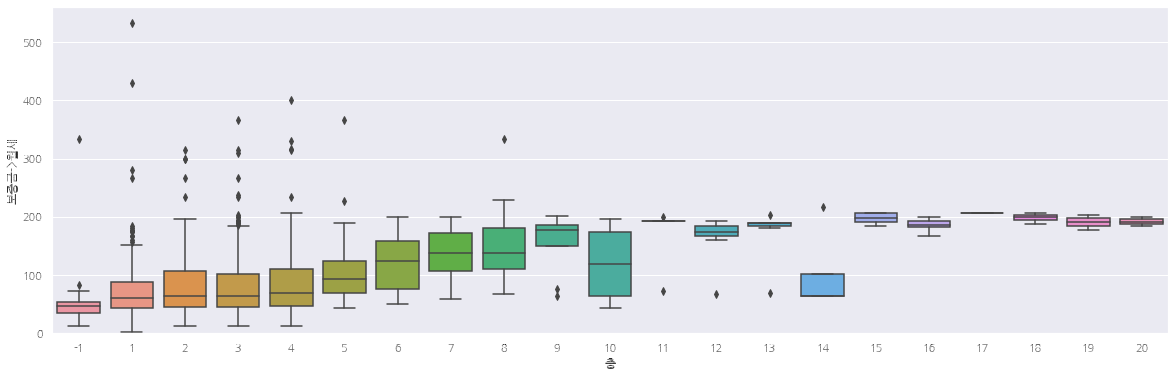

In [61]:
#box plot overallqual/saleprice
var = '층'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

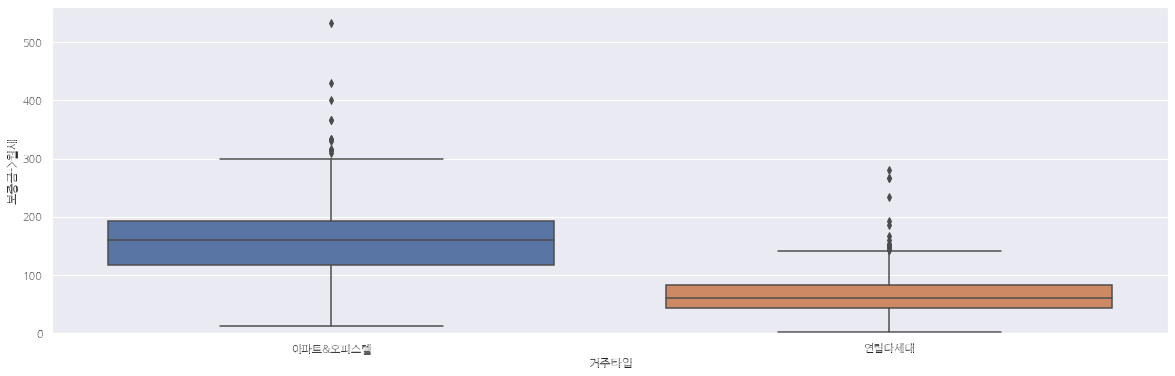

In [72]:
#box plot overallqual/saleprice
var = '거주타입'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

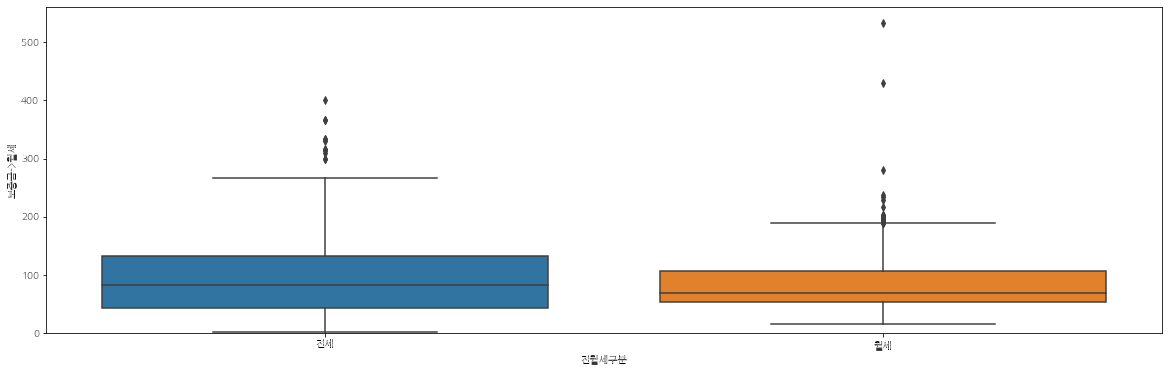

In [16]:
#box plot overallqual/saleprice
var = '전월세구분'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

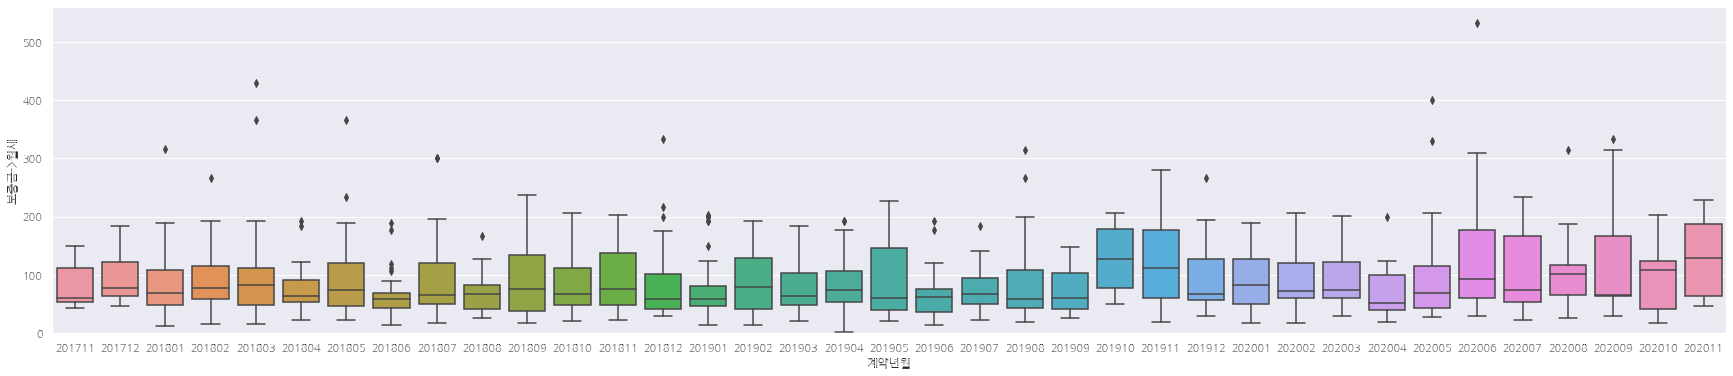

In [76]:
#box plot overallqual/saleprice
var = '계약년월'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

In [ ]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#Correlation matrix

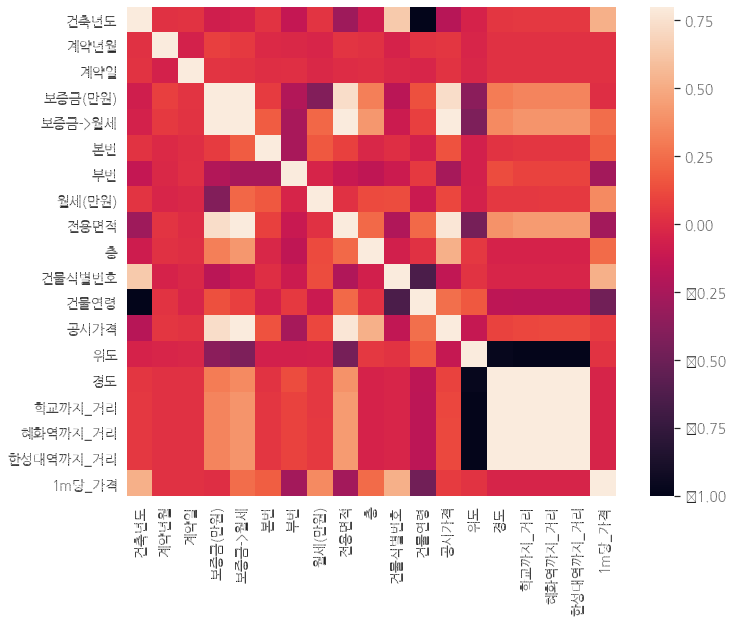

In [24]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

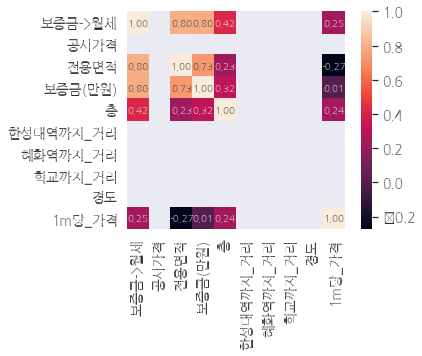

In [32]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, '보증금->월세')['보증금->월세'].index
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

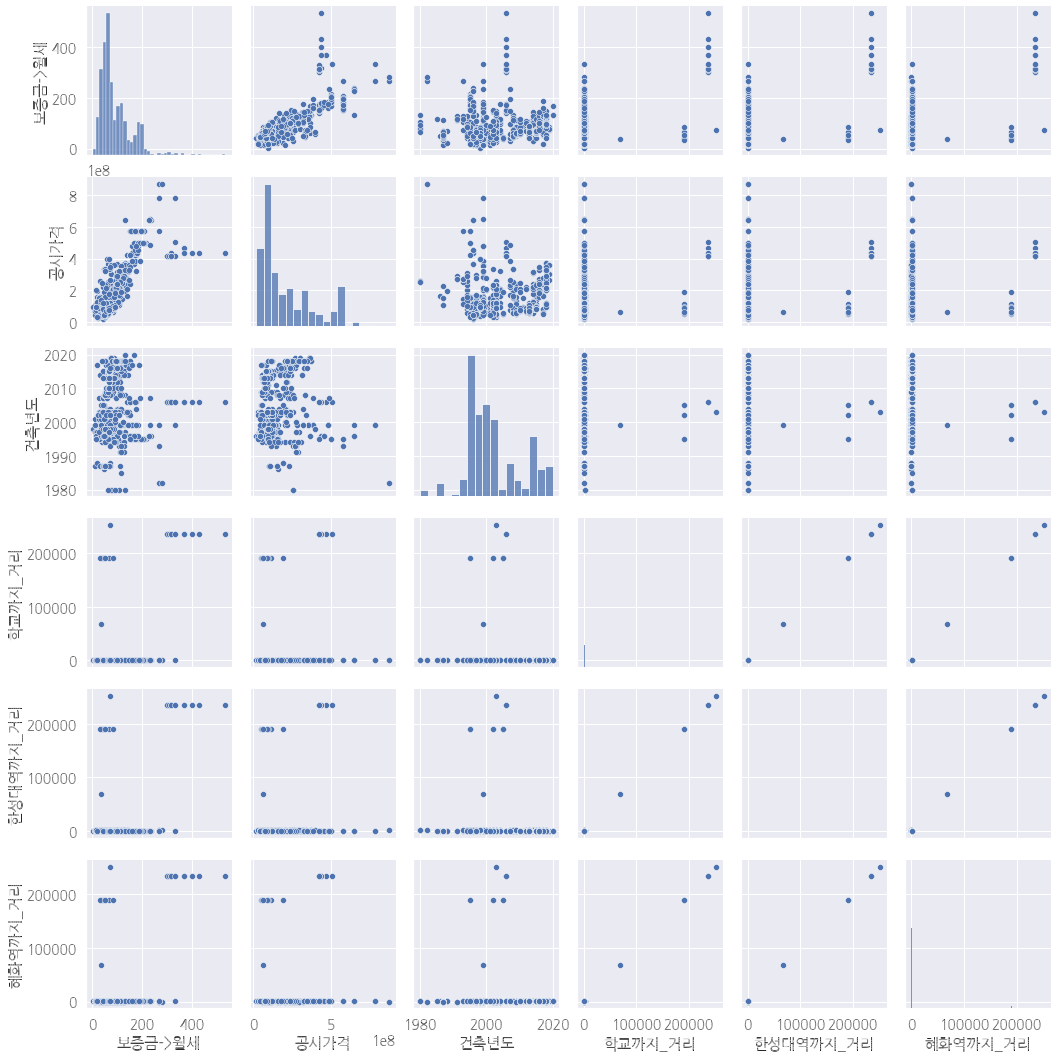

In [35]:
cols = ['보증금->월세', '공시가격', '법정동명', '건축년도', '학교까지_거리', '한성대역까지_거리', '혜화역까지_거리']
sns.pairplot(df[cols], size = 2.5)
plt.show();

#Missing Data

In [43]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
1m당_가격,0,0.0
데이터기준일자,0,0.0
계약년월,0,0.0
계약일,0,0.0
도로명,0,0.0
지번,0,0.0
보증금(만원),0,0.0
보증금->월세,0,0.0
본번,0,0.0
부번,0,0.0


In [42]:
df = df.drop((missing_data[missing_data['Total'] > 40]).index,1)
df = df.drop(df.loc[df['공시가격'].isnull()].index)
df = df.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df.isnull().sum().max() #just checking that there's no missing data missing...

0

#Outlier

Univariate analysis

In [45]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['보증금->월세'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.43799214]
 [-1.26198435]
 [-1.25131721]
 [-1.25131721]
 [-1.25131721]
 [-1.25131721]
 [-1.22464937]
 [-1.22464937]
 [-1.2193158 ]
 [-1.19798152]]

outer range (high) of the distribution:
[[3.57556293]
 [3.60223077]
 [3.82757407]
 [3.86890923]
 [3.86890923]
 [4.40226616]
 [4.40226616]
 [4.93562308]
 [5.41564431]
 [7.06905076]]


Bivariate analysis

In [123]:
len(df)

833

In [ ]:
df.sort_values(by = '공시가격', ascending = False)[:20]

In [ ]:
df.sort_values(by = '보증금->월세', ascending = False)[:100]

In [ ]:
df.sort_values(by = '1m당_가격', ascending = False)[:20]

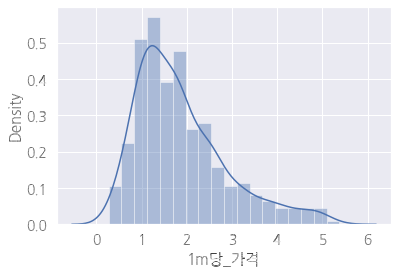

In [147]:
sns.distplot(df['1m당_가격']);

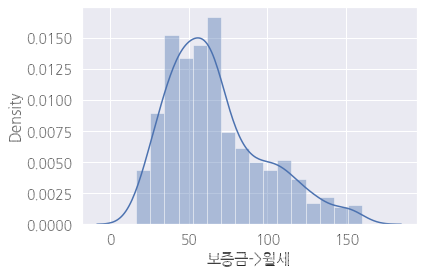

In [146]:
sns.distplot(df['보증금->월세']);

In [135]:
#deleting points
df = df.drop(df[df['보증금->월세'] > 160].index)

#Normality

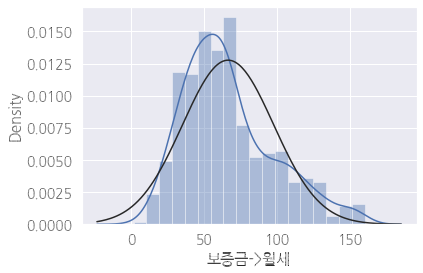

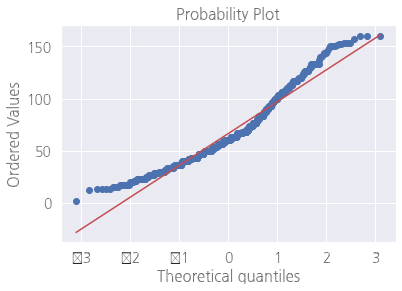

In [139]:
#histogram and normal probability plot
sns.distplot(df['보증금->월세'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['보증금->월세'], plot=plt)

In [140]:
df['log_보증금->월세'] = np.log(df['보증금->월세'])

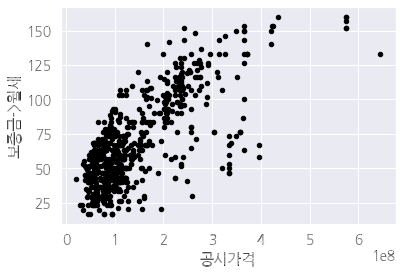

In [185]:
#scatter plot '공시가격'/'보증금->월세'
var = '공시가격'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

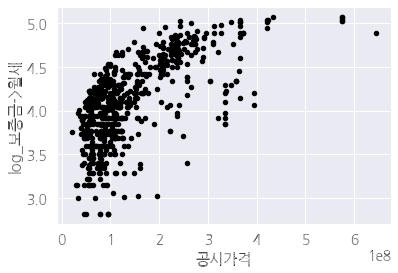

In [156]:
#scatter plot '공시가격'/'보증금->월세'
var = '공시가격'
data = pd.concat([df['log_보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='log_보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

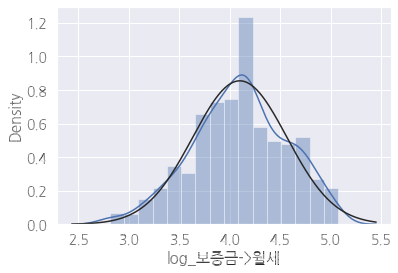

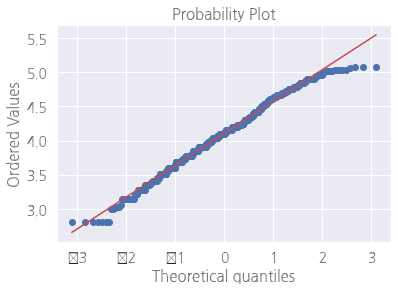

In [184]:
#histogram and normal probability plot
sns.distplot(df['log_보증금->월세'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['log_보증금->월세'], plot=plt)

In [ ]:
#box plot overallqual/saleprice
var = '법정동명'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

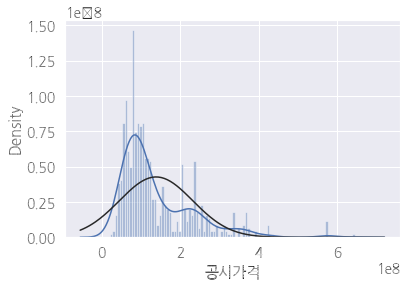

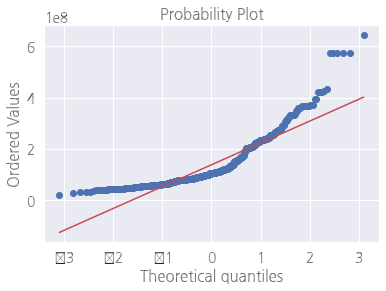

In [177]:
#histogram and normal probability plot
sns.distplot(df['공시가격'], fit=norm, norm_hist=True, bins=100);
fig = plt.figure()
res = stats.probplot(df['공시가격'], plot=plt)

In [176]:
df['log_공시가격'] = np.log(df['공시가격'])

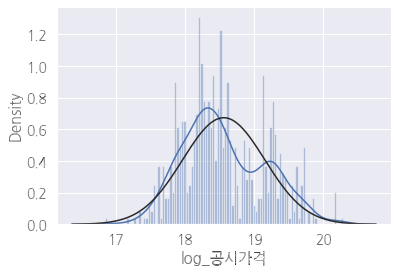

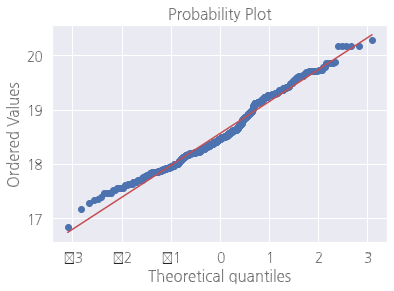

In [178]:
#histogram and normal probability plot
sns.distplot(df['log_공시가격'], fit=norm, norm_hist=True, bins=100);
fig = plt.figure()
res = stats.probplot(df['log_공시가격'], plot=plt)

In [144]:
#deleting points
df = df.drop(df[df['log_보증금->월세'] < 2.8].index)

#Homoscedasticity

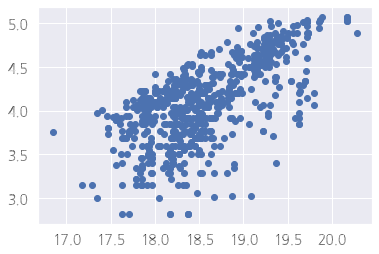

In [179]:
#scatter plot
plt.scatter(df['log_공시가격'], df['log_보증금->월세']);

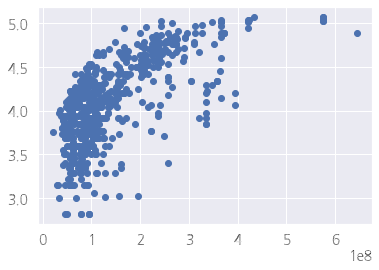

In [180]:
#scatter plot
plt.scatter(df['공시가격'], df['log_보증금->월세']);

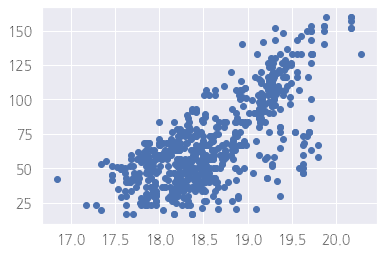

In [181]:
#scatter plot
plt.scatter(df['log_공시가격'], df['보증금->월세']);

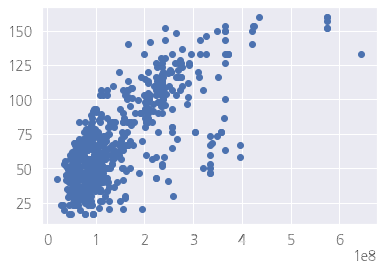

In [182]:
#scatter plot
plt.scatter(df['공시가격'], df['보증금->월세']);

In [ ]:
df.head(10)

#to_csv

In [189]:
df.to_csv('/content/gdrive/My Drive/recommend_system/tracer/preprocessed_1.csv', index=False, encoding='cp949')

#Reference

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python